# A Comprehensive Guide to Multi-Modal RAG on PDFs using GPT4Vision and LlamaIndex

![alt text](Multimodel_RAG_GPT4v_LlamaIndex.png "Title")


# Exploring Multi-Model RAG for PDF using GPT4V & LlamaIndex

## Overview
PDF is one of the most widely used formats for storing and sharing documents. However, PDFs are not easy to process and analyze, especially when they contain images and complex layouts. How can we leverage the power of natural language processing and computer vision to handle PDFs and generate meaningful responses to queries?

In this blog, we will explore the concept of Multi-Model RAG, a system that integrates different models to enhance retrieval-augmented generation. We will use GPT4V, a state-of-the-art language model that can generate text and handle queries, and LlamaIndex, a multi-modal retrieval system that can index and search text and image embeddings. We will also use Qdrant, a vector store that supports storage, search, and management of large amounts of vector data. We will show how these components work together to create a robust and scalable architecture for handling PDFs.

## Multi-Model RAG
Retrieval-augmented generation (RAG) is a technique that combines a generative model with a retrieval system to improve the quality of responses. The generative model takes a query as input and generates a response by conditioning on relevant documents retrieved from a large corpus. The retrieval system helps the generative model to access external knowledge and avoid hallucinations or repetitions.

Multi-Model RAG is an extension of RAG that integrates different models to handle different modalities of data, such as text, images, audio, video, etc. Multi-Model RAG can leverage the strengths of each model and provide richer and more diverse responses. For example, a multi-model RAG system can answer a query about a PDF document by retrieving and generating text from the document, as well as retrieving and generating images from the document.

## Multi-model LLM(GPT4V)
GPT4V is a multi-model language model that can generate text and handle queries. It is based on GPT-4, the latest version of the GPT family of models, which has achieved impressive results in natural language understanding and generation. GPT4V extends GPT-4 by adding a vision module that can process images and generate captions, descriptions, or questions about them. GPT4V can also handle queries that involve both text and images, such as "What is the name of the person in the picture?" or "How many apples are there in the image?".

GPT4V has several features that make it suitable for multi-model RAG. First, it can generate text in a variety of domains and styles, such as news articles, essays, poems, code, etc. Second, it can handle natural language queries and generate relevant and coherent responses. Third, it can process images and generate text that describes or relates to them. Fourth, it can handle multi-modal queries and generate multi-modal responses. Fifth, it can learn from large amounts of unlabeled data and adapt to new tasks and domains.

## LlamaIndex
LlamaIndex is a multi-modal retrieval system that can index and search text and image embeddings. It is based on Llama, a framework for large-scale language modeling and alignment, which can learn cross-modal representations from text and images. LlamaIndex uses Llama to generate text embeddings and image embeddings from PDF documents and store them in a vector store. LlamaIndex can then retrieve relevant text chunks and images from the vector store based on a query.

LlamaIndex has several advantages for multi-model RAG. First, it can handle both text and image data and provide a unified interface for retrieval. Second, it can learn from large-scale unlabeled data and align text and image embeddings in a common space. Third, it can support efficient and scalable retrieval using approximate nearest neighbor search algorithms. Fourth, it can support complex queries that involve multiple modalities, such as "Show me the images that contain the word 'cat'".

## Qdrant
Qdrant is a vector store that supports storage, search, and management of large amounts of vector data. It is designed for high-performance and high-availability applications that require fast and accurate vector similarity search. Qdrant can store text embeddings and image embeddings generated by LlamaIndex and provide a REST API for querying and updating them. Qdrant can also support advanced features such as filtering, ranking, clustering, and analytics of vector data.

Qdrant is a key component for multi-model RAG, as it enables efficient and scalable storage and retrieval of text and image embeddings. Qdrant can handle millions of vectors and support sub-second response times for queries. Qdrant can also support dynamic updates and modifications of vector data, such as adding, deleting, or updating embeddings. Qdrant can also support custom scoring functions and filters for ranking and filtering results.

## Architecture
The architecture for multi-model RAG using GPT4V and LlamaIndex is shown in the image below. It consists of the following steps:

- Input Source (PDF): A PDF document is the input source for the system. It can be uploaded by the user or fetched from a URL.
- Extraction: The PDF document undergoes extraction to separate images from text chunks. The images are resized and converted to JPEG format. The text chunks are tokenized and normalized.
- Metadata Extraction: The images are processed by GPT4V to extract image metadata, such as captions, descriptions, or questions. The image metadata is stored along with the images in the vector store.
- Multimodal Vector Store (Qdrant): The text chunks and the images (along with the image metadata) are embedded by LlamaIndex and stored in Qdrant. Qdrant provides a REST API for querying and updating the embeddings.
- Query Engine (GPT4V): GPT4V is used as the query engine that takes input queries from the user and generates responses. GPT4V can handle natural language queries and generate text responses. GPT4V can also handle multi-modal queries and generate text and image responses.
- Retrieval Engine: The retrieval engine aids in single point retrieval connecting multimodal vector store with query engine. It retrieves relevant text chunks and images from Qdrant based on the query and passes them to GPT4V. GPT4V then conditions on the retrieved documents and generates a response.

# Extract images and meta data from the PDF

In [1]:
# STEP 1 
# import libraries 
import fitz 
import io 
from PIL import Image 
import os
import json
import matplotlib.pyplot as plt

#PyMuPDF
# STEP 2 
pwd = os.getcwd()
# file path you want to extract images from 
source = os.path.join(pwd,'source_files')
file = os.path.join(source,'paper.pdf')

def load_pdf(source_files, file_):
	# open the file 
	pdf_file = fitz.open(file_) 
	image_counter = 0
	metadata = {}
	for page_index in range(0,len(pdf_file)): 
		# get the page itself 
		page = pdf_file[page_index] 
		# get block details from the page
		blocks = pdf_file[page_index].get_text("blocks")
		# get image info and title details 
		image_meta = [ (blocks[i][4], blocks[i+1][4]) for i in range(0,len(blocks)) if blocks[i][-1]==1 ] 	
		image_info= [ image_meta[0][0] if image_meta  else []] 
		image_title = [ image_meta[0][1] if image_meta else []] 
		# prepare image meta data from the page
		for image in page.get_images():
			image_id = image[7] # img<no>
			image_block_id = image[0] # block number 
			image_title_block_id = image_block_id+1 # image title block number
			image_dim = image[2],image[3] # image dimension details
			
			print(f"[+] Page:{page_index}, Image : {image_id}, Block:{image_block_id}, Image Dim:{image_dim}")
			image_counter = image_counter+1

			# Update metadata dictionary with image information
			metadata[image_counter] = {
				'page': page_index,
				'image': image_id,
				'block': image_block_id,
				'image_dim': image_dim,
				'image_info': str(image_info[0]),
				'image_title': str(image_title[0]),
				'image_file': f"{image_id}_{image_block_id}.png",
				'image_path': os.path.join(source_files, f"{image_id}_{image_block_id}.png")
			}
		# save the images to the local file system
			pix = fitz.Pixmap(pdf_file, image[0])
			# image file name contains image name 'img<no>' and block number
			pix.save(os.path.join(source_files, f"{image_id}_{image_block_id}.png"))
	print(f"Total Images: {image_counter}")
	
	with open(os.path.join(source,f'metadata.json'),'w') as f:
		json.dump(metadata,f)
	return metadata
	
metadata = load_pdf(source, file)

[+] Page:0, Image : Im1, Block:5, Image Dim:(2714, 1803)
[+] Page:2, Image : Im3, Block:67, Image Dim:(3028, 2963)
[+] Page:5, Image : Im4, Block:328, Image Dim:(598, 213)
[+] Page:5, Image : Im5, Block:332, Image Dim:(536, 163)
[+] Page:6, Image : Im6, Block:336, Image Dim:(1880, 1280)
[+] Page:7, Image : Im7, Block:429, Image Dim:(881, 314)
[+] Page:8, Image : Im8, Block:463, Image Dim:(654, 406)
[+] Page:9, Image : Im9, Block:524, Image Dim:(789, 382)
[+] Page:11, Image : Im10, Block:634, Image Dim:(751, 509)
[+] Page:11, Image : Im11, Block:654, Image Dim:(787, 392)
[+] Page:17, Image : Im12, Block:947, Image Dim:(840, 480)
[+] Page:18, Image : Im13, Block:1028, Image Dim:(820, 740)
[+] Page:20, Image : Im14, Block:1079, Image Dim:(1580, 465)
[+] Page:24, Image : Im15, Block:1288, Image Dim:(996, 274)
Total Images: 14


## Helper functions to display the images

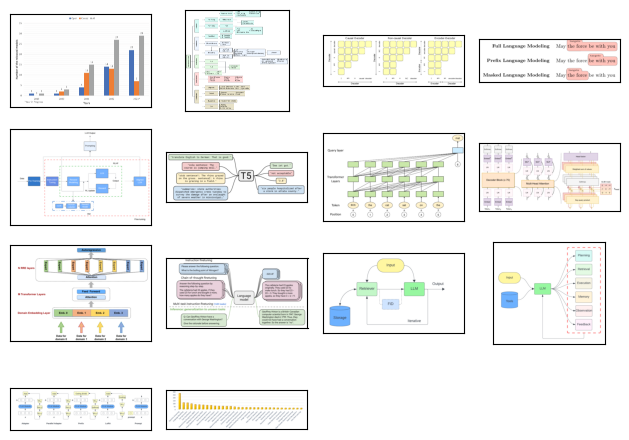

In [2]:
# Define a function to plot images given a list of image paths
def plot_images(image_paths):
    # Initialize a counter to track the number of images shown
    images_shown = 0
    # Set the figure size for the entire plot
    plt.figure(figsize=(16, 9))
    # Iterate through each image path in the provided list
    for img_path in image_paths:
        # Check if the file exists
        if os.path.isfile(img_path):
            # Open the image using the Image module
            image = Image.open(img_path)
            # Create a subplot for the current image in a 2x3 grid
            plt.subplot(2, 3, images_shown + 1)
            # Display the image in the subplot
            plt.imshow(image)
            # Remove x and y ticks for clarity
            plt.xticks([])
            plt.yticks([])
            # Increment the counter for images shown
            images_shown += 1
            # Break the loop if 9 images have been shown
            if images_shown >= 9:
                break

def plot_images_metadata(metadata):
    # List to store original image URLs
    original_images_urls = []
    # Counter to track the number of images shown
    images_shown = 0

    # Iterate through each image in the metadata
    for image_id in metadata:
        # Get the image path from metadata
        image_path = metadata[image_id]['image_path']
        # Check if the file exists
        if os.path.isfile(image_path):
            # Get filename from metadata
            filename = metadata[image_id]['image_file']
            # Open and convert the image to RGB
            image = Image.open(image_path).convert("RGB")

            # Plot the image in a subplot
            plt.subplot(4, 4, len(original_images_urls) + 1)
            plt.imshow(image)
           
            # Remove ticks for clarity
            plt.xticks([])
            plt.yticks([])

            # Add filename to the list of original image URLs
            original_images_urls.append(filename)
            # Increment the counter for images shown
            images_shown += 1
            # Break the loop if 16 images have been shown
            if images_shown >= 16:
                break

    # Adjust layout for better visualization
    plt.tight_layout()

# Call the function with the provided metadata
plot_images_metadata(metadata)


## Define OpenAI Key

In [3]:
from dotenv import load_dotenv
import openai

# Load environment variables from .env file
load_dotenv()
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
openai.api_key = OPENAI_API_KEY

ModuleNotFoundError: No module named 'dotenv'

## Create Qdrant vector store using Multimodel Vector Index from LLamaIndex

In [3]:
import qdrant_client
from llama_index import (
    ServiceContext,
    SimpleDirectoryReader,
)
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index import VectorStoreIndex, StorageContext
from llama_index.indices.multi_modal.base import MultiModalVectorStoreIndex

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_mm")

# Create QdrantVectorStore instances for text and image collections
text_store = QdrantVectorStore(
    client=client, collection_name="text_collection"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)

# Create a StorageContext to hold vector and image stores
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Load data from a SimpleDirectoryReader for creating the MultiModal index
documents = SimpleDirectoryReader("./source_files/").load_data()

# Create a MultiModalVectorStoreIndex from the loaded documents
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

/home/sudouser/anaconda3/envs/openai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Test the retrieval engine 

In [4]:
# Define the query string
query = "What are the various stages of LLMs from pre-training"

# Create a retriever engine using the MultiModalVectorStoreIndex
# Set the top-k parameters for text and image similarity
retriever_engine = index.as_retriever(similarity_top_k=3, image_similarity_top_k=3)

# Use the retriever engine to retrieve results for the given query
retrieval_results = retriever_engine.retrieve(query)


In [5]:
retrieval_results

[NodeWithScore(node=TextNode(id_='15b99c90-d71a-49d8-a804-6dbe076b7f4f', embedding=None, metadata={'page_label': '3', 'file_name': 'paper.pdf', 'file_path': 'source_files/paper.pdf', 'file_type': 'application/pdf', 'file_size': 2070163, 'creation_date': '2023-12-29', 'last_modified_date': '2023-12-29', 'last_accessed_date': '2023-12-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='2352b351-be31-4942-a204-0e9149ce6f59', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '3', 'file_name': 'paper.pdf', 'file_path': 'source_files/paper.pdf', 'file_type': 'application/pdf', 'file_size': 2070163, 'creation_date': '2023-12-29', 'last_modified_date': '2023-12-29', 'last_accessed_date': '2023-12-30'}

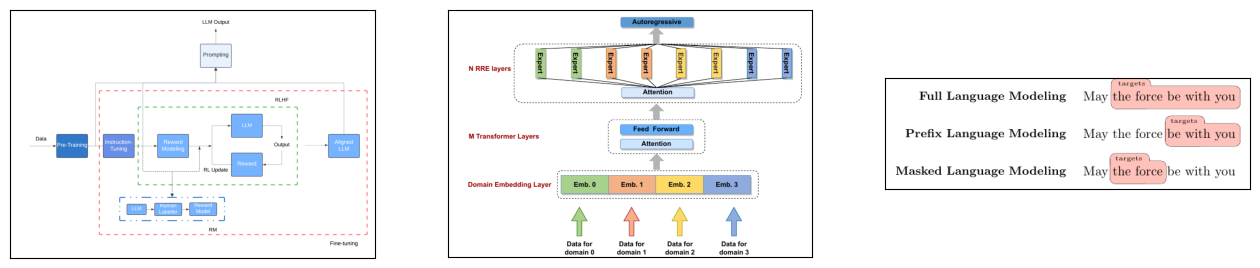

In [6]:
# Extract image paths from retrieval results metadata for images of type 'image/png'
image_paths = [
    retrieval_results[i].metadata['file_path']
    for i in range(len(retrieval_results))
    if retrieval_results[i].metadata['file_type'] == 'image/png'
]
# plot the retrieved images
plot_images(image_paths)


In [7]:
# Import the OpenAIMultiModal class from the multi_modal_llms module in llama_index
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

# Create an instance of the OpenAIMultiModal class
# Specify the model to use (e.g., "gpt-4-vision-preview") and set the maximum number of new tokens
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview",
    max_new_tokens=1500
)

## Query on the retrieved images from vector store using GPT4v

In [8]:
# Create a SimpleDirectoryReader instance with a list of image paths
# Note: The input_files parameter is assumed to be a list of image paths
image_path_reader = SimpleDirectoryReader(input_files=image_paths)

# Load data using the SimpleDirectoryReader to obtain a data structure (image_path_)
image_path_ = image_path_reader.load_data()

# Display the loaded data (image_path_)
image_path_

[ImageDocument(id_='a89c163f-1d21-4c32-88f3-64cc4b117c5e', embedding=None, metadata={'file_path': 'source_files/Im6_336.png', 'file_name': 'Im6_336.png', 'file_type': 'image/png', 'file_size': 52958, 'creation_date': '2023-12-30', 'last_modified_date': '2023-12-30', 'last_accessed_date': '2023-12-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, hash='1a703bcaefbf0f45f0f29524846ad898b055e15a92f44dca7f8c3b0f66b1f78c', text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='source_files/Im6_336.png', image_url=None, text_embedding=None),
 ImageDocument(id_='fdd554ab-e115-48bd-b6d2-3bdad370eb9c', embedding=None, metadata={'file_path': 'so

In [9]:
# Use the OpenAIMultiModal instance to generate a completion response for image description
# Provide a prompt for text generation
# Supply the image documents obtained from the SimpleDirectoryReader 
response_img = openai_mm_llm.complete(
    prompt="Can you describe the image",
    image_documents=image_path_,
)

# Print or process the generated completion response
print(response_img)

The images you've provided appear to be diagrams related to machine learning and natural language processing concepts.

1. The first image is a flowchart that outlines a process involving a language model (LLM). It shows a cycle that includes "Pre-Training," "Instruction Tuning," and "Fine-tuning" stages. Within the fine-tuning stage, there's a sub-process involving "RLHF" (Reinforcement Learning from Human Feedback), which includes components like "Reward Modeling," "Human Labeler," and an "Aligned LLM" that outputs a result which is then used to update the LLM. This diagram likely represents a method for training a language model to align with human preferences or instructions.

2. The second image is a schematic of a neural network architecture. It shows a stack of "N RRE layers" followed by "M Transformer Layers." The RRE layers are connected in an autoregressive manner, which suggests that each layer's output is used as input for the next. The Transformer layers include blocks rep

## Create an Query engine using GPT4v LLM on MultiModalVectorStoreIndex 

In [10]:
# Create a query engine using the MultiModalVectorStoreIndex
# Supply the OpenAIMultiModal instance as the multi_modal_llm
query_engine = index.as_query_engine(
    multi_modal_llm=openai_mm_llm,
    similarity_top_k=3, 
    image_similarity_top_k=3
)

## Query on the engine and retrieve the reference metadata

In [11]:
# Define the query string for the multi-modal query
query_str = "What are the various stages of LLMs from pre-training"

# Use the query engine to process the multi-modal query
response_mm = query_engine.query(query_str)

# Print the response from the query engine as a string
print(str(response_mm))


The various stages of LLMs (Large Language Models) from pre-training, as described in the provided context, include:

1. Pre-Training: In this initial stage, the model is trained in a self-supervised manner on a large corpus to predict the next tokens given the input. The design choices of LLMs vary from encoder-decoder to decoder-only architectures with different building blocks and loss functions.

2. Fine-Tuning: After pre-training, LLMs can be fine-tuned for specific downstream tasks. This involves several approaches:
   - Transfer Learning: Pre-trained models are fine-tuned with task-specific data to improve performance for a particular task.
   - Instruction-tuning: The pre-trained model is fine-tuned on instruction-formatted data, which includes instructions and input-output pairs in natural language, to enable the model to respond effectively to user queries.
   - Alignment-tuning: Models are aligned with human preferences using human feedback to avoid generating false, biased,

**Node ID:** 15b99c90-d71a-49d8-a804-6dbe076b7f4f<br>**Similarity:** 0.8493292245320353<br>**Text:** PREPRINT 3
Fig. 3: A broader overview of LLMs, dividing LLMs into five branches: 1. Training 2. Inference 3. Evaluation 4. Applications
5. Challenges
LLMs literature in surveys [46], [47], [48], [49], and topic-
specific surveys in [50], [51], [52], [53], [54]. In contrast
to these surveys, our contribution focuses on providing a
comprehensive yet concise overview of the general direction
of LLM research. This article summarizes architectural and
training details of pre-trained LLMs and delves deeper into
the details of concepts like fine-tuning, multi-modal LLMs,
robotics, augmented LLMs, datasets, evaluation, and others
to provide a self-contained comprehensive overview. Our key
contributions are summarized as follows.
•We present a survey on the developments in LLM re-
search with the specific aim of providing a concise yet
comprehensive overview of the direction.
•We present extensive summaries of pre-trained models
that include fine-grained details of architecture and train-ing...<br>

**Node ID:** 6f219839-39c7-427a-b09f-67d1620406e1<br>**Similarity:** 0.8421907353463534<br>**Text:** PREPRINT 7
Fig. 6: A basic flow diagram depicting various stages of LLMs from pre-training to prompting/utilization. Prompting LLMs
to generate responses is possible at different training stages like pre-training, instruction-tuning, or alignment tuning.
3. Masked Language Modeling: In this training objective,
tokens or spans (a sequence of tokens) are masked randomly
and the model is asked to predict masked tokens given the
past and future context. An example is shown in Figure 5.
4. Unified Language Modeling: Unified language model-
ing [92] is a combination of causal, non-causal, and masked
language training objectives. Here in masked language mod-
eling, the attention is not bidirectional but unidirectional,
attending either left-to-right or right-to-left context.
L. Model Adaptation
This section discusses the fundamentals of LLMs adaptation
stages, from pre-training to fine-tuning for downstream tasks
and utilization. An example of different training stages and
inference in LLM...<br>

**Node ID:** 24cede4b-0651-41c8-abaa-8595a3f476af<br>**Similarity:** 0.8309538555811679<br>**Text:** PREPRINT 31
model offers transparent and accessible resources to develop
novel applications such as robo-advising, algorithmic trading,
and low-code solutions, ultimately expanding the capabilities
of financial services. Both BloombergGPT and FinGPT show
the adaptability of LLMs to the financial domain, with the
former showing the power of custom datasets and the latter
emphasizing a data-centric approach and low-rank adaptation
techniques for customization. Moreover, LLMs demonstrate an
ability to break down complex financial tasks into actionable
plans, enabling end-to-end solutions that were previously
unfeasible with a single model [473].
Others: The application of LLM in coding is introduced in
Section III-A2. For the utility of LLMs in robotics, please
refer to Section III-D.
VIII. S UMMARY AND DISCUSSION
A. Architecture
Due to the gigantic scale of LLMs, minor changes in
architecture and training strategies have a big impact on per-
formance and stability. Here, we summarize ...<br>

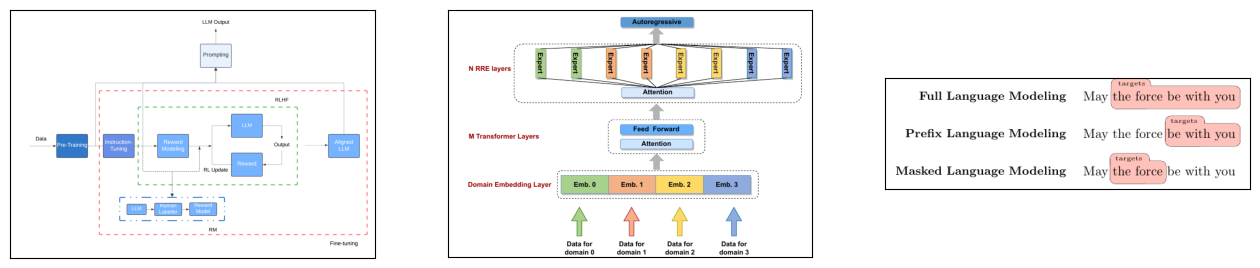

In [12]:
# Import necessary utility functions from the llama_index.response.notebook_utils module
from llama_index.response.notebook_utils import display_source_node

# Iterate through each text node in the response metadata
for text_node in response_mm.metadata["text_nodes"]:
    # Display the source node using the display_source_node utility
    # Limit the displayed source length to 200 characters
    display_source_node(text_node, source_length=1000)

# Plot images using the plot_images function
# The image paths are extracted from the image nodes in the response metadata
plot_images(
    [n.metadata["file_path"] for n in response_mm.metadata["image_nodes"]]
)
